# What is Annealing?
Annealing is the process of heating up a material so that it becomes more flexible. If you've ever watched a blacksmith or a glass blower, you've observed this process. When the temperature is high, the material is able to change shape. When it cools down, it has a more stable form.

# Simulated Annealing
Simulated annealing is an optimization technique. It happens in a couple of steps. The general algorithm is performed by picking a random starting point in the solution space. You then find neighboring points and choose to move your solution pointer to one of those points stochastically. More details are outlined below. Let's walk through this code while we try to find the maximum value of the sinc function
$$sinc(x) = \frac{sin(x)}{x}$$


Like most of our code, we're going to want to be importing some utility functions. Usually you'll want a plotting library, a random library, and a library to handle any specialized operations that you'll need.

Before we do any fancy coding, we're going to graph it and show it below.

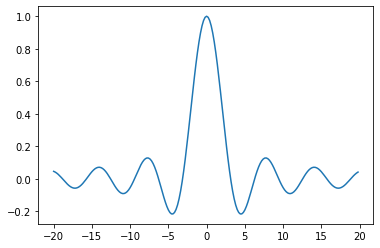

In [ ]:
import matplotlib.pyplot as plt
import random
import math

def sinc(x):
    if x == 0:
        return 1
    else:
        return math.sin(x)/x

def plot_sinc():
    x = []
    y = []
    for i in range(-100,100):
        x.append(i / 5)
        y.append(sinc(i/5))

    plt.plot(x,y)

plot_sinc()

## Step 1: Finding a neighbor
In this step we define the state of our problem and define heuristics for how our program will traverse the solution space.


In [ ]:
  """
    Stochastically generates a random neighbor from the current
  """
def generate_neighbor(current_value):
    neighbor = current_value + random.uniform(-5, 5)
    neighbor = clip(neighbor, (-50, 50))
    return neighbor


  """
  Function to round a number to the lower and upper bounds of our problem
  """
def clip(value, bounds):
    value = min(value, bounds[1])
    value = max(value, bounds[0])
    return value

test_vals = list(range(-3,10))
clipped_vals = [clip(v, (0,5)) for v in test_vals]

print(test_vals)
print(clipped_vals)

[-3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 0, 0, 0, 1, 2, 3, 4, 5, 5, 5, 5, 5]


Here is an illustration to show how our neighbor generation works

(array([ 53.,  64.,  54.,  45.,  63.,  59.,  62.,  59.,  66., 475.]),
 array([44.01417736, 44.61275962, 45.21134189, 45.80992415, 46.40850642,
        47.00708868, 47.60567094, 48.20425321, 48.80283547, 49.40141774,
        50.        ]),
 <a list of 10 Patch objects>)

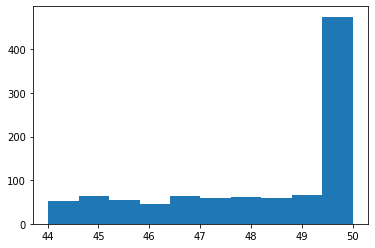

In [ ]:
near_edge_neighbors = []
for i in range(1000):
    near_edge_neighbors.append(generate_neighbor(49))

plt.hist(near_edge_neighbors)

## Step 2: Calculate Temperature
Think about the example of metalurgy. When we increase the temperature of the metal we make it more flexible.  in our example, if we change the temperature of our model, we make it more or less likely to accept the neighbor.




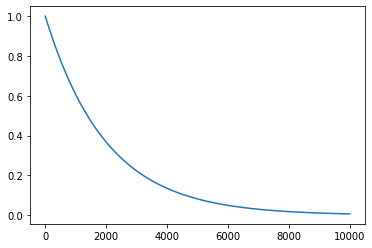

In [ ]:
steps = 10000
def calculate_temp(step, num_steps):
    init_temp = 1
    alpha = 5
    return init_temp * (1 - alpha/num_steps)**step

x=list(range(steps))
y=[calculate_temp(s, steps) for s in range(steps)]
plt.plot(x,y)


## Step 3: Choose to accept or reject a neighbor
Once you have generated your neighbors you will either accept or reject them as new solutions. The probability of acceptance will be proportional to the temperature.

In [ ]:
def accept_neighbor(neighbor, current_solution, temp):
    value_diff = sinc(neighbor) - sinc(current_solution)
    prob_accept = math.exp(value_diff / temp)
    return random.random() < prob_accept

Here is an example where the generated neighbor value is better than our current value. In this case, we would ideally reject our current value, and go with the neighbor.

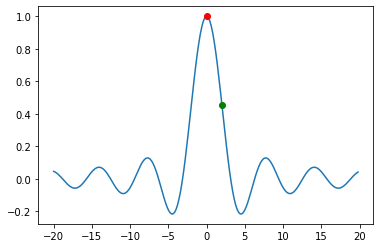

In [ ]:
current_value = 2
neighbor_value = 0

plot_sinc()
plt.plot([current_value],[sinc(current_value)],"o",color="green")
plt.plot([neighbor_value],[sinc(neighbor_value)],"o",color="red")

Let's see how often we reject this neighbor given a temperature measurement

In [ ]:
temps = [0.001, 0.1, 1, 10000]
temp_results = []
for t in temps:
    counts = [0,0]
    for i in range(10000):
        accept = accept_neighbor(neighbor_value, current_value, t)
        counts[accept] += 1
    temp_results.append(counts)
    
print(temp_results)

[[0, 10000], [0, 10000], [0, 10000], [0, 10000]]


Now let's take a look at a scenario where the neighbor that we generate is worse than our current. Let's say that our current value is the optimal, and the neighbor is suboptimal.

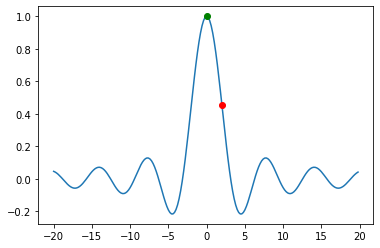

In [ ]:
current_value = 0
neighbor_value = 2

plot_sinc()
plt.plot([current_value],[sinc(current_value)],"o",color="green")
plt.plot([neighbor_value],[sinc(neighbor_value)],"o",color="red")

In [ ]:
temps = [0.001, 0.1, 1, 10000]
temp_results = []
for t in temps:
    counts = [0,0]
    for i in range(10000):
        accept = accept_neighbor(neighbor_value, current_value, t)
        counts[accept] += 1
    temp_results.append(counts)
    
print(temp_results)

[[10000, 0], [9955, 45], [4246, 5754], [0, 10000]]


Notice how at low temperatures, we will almost never accept the suboptimal value at a low temperature; however, at high temperatures, we will almost always get accept the new one.

#Why use Simulated Annealing?
If you've ever done numerical analysis you might be familiar with Euler's method. You might also be aware of the fact that it fails when you get stuck on a local minimum or maximum. The sinc fucntion is great at illustrating how there are lots of local extrema. Much like a piece of glass or iron in a workshop, we just need to turn up the temperature a bit and get clever with our heuristics to help us find the optimal answer on problems whose solutions aren't immediately clear.

# Genetics
Now instead of drawing inspiration from craftspeople and artisans, we will draw our inspiration from mother nature herself.

# The Theory of Evolution
Evolution is a topic that is inconsistently taught throughout the US and other parts of the world, so let's do a really quick refresher. We won't go through the entire history of Darwin and his adventures in the Galapagos, but we will talk about the three main observations that the theory revolves around.

## Genetic Variation

It's pretty common to hear people say "I'm not like other ___". They're right. Organisms that reproduce sexually like humans, dogs,and other animals have different traits within a population. These different traits can be seen in our hair color, height, strength, etc.

## Fitness

The different traits make an organism more or less fit than others. That is, their traits can make them better at gathering resources or attracting mates. Fitness increases an organism chances of reproducing.

## Inheritance
The genes that you have don't come from thin air. You probably look like your parents. Your parents probably look like theirs and so on and so forth.


# Genetic Algorithms

## Traits
We will use these same principles to create our algorithm. Instead of organism that evolve with traits, we will create strategies or solution parameters. Just like how our genetics and traits determine the fitness, the parameters and strategies will determine the payout. Let's take the game of blackjack. Let's say that we're going to follow a simple stratey and choose a number n. If the value of our hand is less than n, then we hit and ask for another card. If it is less than n, we will stay.

Once we decide how to generate these traits, we will generate a population of these strategies.

In [ ]:
#returns a minimum value between 0 and 21. These are the traits that we will be testing
def random_strategy():
  return random.randint(0,21)

#generates a population of individual strategies
#should call the strategy/generate individual
def generate_population(population_size):
  return [random_strategy() for _ in range(population_size)]


## Survivial Of The Fittest
To determine which model is the most fit, we will need to make them compete against each other. One great way to do that is by simulating a tournament of some kind. Similar to our Monte Carlo simulations, we will randomly draw from our population

We will randomly select them pairwise and have them compete against each other. Based on how often thy

Here is a great example of how tournaments can be used to find the best strategy. Play through this game and try to see how it relates to our genetic algorithm. It's a really great example that will give you a good understanding of how genetic algorithms can be used to make decisions in economics and some flaws that you may run into.

https://ncase.me/trust/

For our purposes we will need to code a game of blackjack. This starts with a deck and a strategy.

In [ ]:
def create_deck():
  suits = ["H","D","S","C"]
  values = [i for i in range(1,14)]
  return [(s,v) for s in suits for v in values]

create_deck()

[('H', 2),
 ('H', 3),
 ('H', 4),
 ('H', 5),
 ('H', 6),
 ('H', 7),
 ('H', 8),
 ('H', 9),
 ('H', 10),
 ('H', 11),
 ('H', 12),
 ('H', 13),
 ('D', 2),
 ('D', 3),
 ('D', 4),
 ('D', 5),
 ('D', 6),
 ('D', 7),
 ('D', 8),
 ('D', 9),
 ('D', 10),
 ('D', 11),
 ('D', 12),
 ('D', 13),
 ('S', 2),
 ('S', 3),
 ('S', 4),
 ('S', 5),
 ('S', 6),
 ('S', 7),
 ('S', 8),
 ('S', 9),
 ('S', 10),
 ('S', 11),
 ('S', 12),
 ('S', 13),
 ('C', 2),
 ('C', 3),
 ('C', 4),
 ('C', 5),
 ('C', 6),
 ('C', 7),
 ('C', 8),
 ('C', 9),
 ('C', 10),
 ('C', 11),
 ('C', 12),
 ('C', 13)]

In [4]:
test = [("H",10),("H",10),("D",1)]
#calculates the value of a hand and the expected value of a strategy.
def hand_value(hand):
  hand_value = 0
  count_aces = 0
  for _,value in hand:
    if value == 1:
      if value + 11 > 21:
        hand_value += 1
      else:
        hand_value += 11
        count_aces += 1
    else:
      hand_value += min(value,10)
    while hand_value >21 and count_aces:
      hand_value -= 10
      count_aces -= 1
  return hand_value if hand_value <= 21 else 0

def deal_hand(deck):
  hand = [deck.pop(random.randrange(len(deck))) for _ in range(2)]
  return hand

def hit_hand(min_val,hand,deck):
  while hand_value(hand_value) < min_val:
    #add to the hand
    hand.append(deck.pop(random.randrange(len(deck))))
    return hand

def play_game(player_min):
  deck = create_deck()
  player_hand = deal_hand(deck)
  hit_hand(player_min,hand,deck)


# Select Parents & Generate Children
We should randomly draw form the current population and allow them to create children. 

One way is for each parent that you select, their child will be a clone that is included in the new population. 
There are many methods for deciding how parents will be split. 

We covered one point crossover in class. Where you choose an index and then split across.

Since we have numeric solutions, we will use a weighted average. Two parents will generate two children.
$c_1 = 0.3 p_1 + 0.7 p_2$
$c_2 = 0.7 p_1 + 0.3 p_2$

We can also do this with a random weight.

$c_1 = w_1 p_1 + (1-w_1) p_2$

$c_2 = (1-w_2) p_1 + (1-w_2) p_2$


# Mutating Children
We want to avoid any sinks that our children generation children has created.

|$\delta$| P|
|---|---|
|-2|0.1|
|-1|0.2|
|0|0.4|
|+1|0.2|
|+2|0.1|

I want to add $\delta$ to the min value with the listed probabilities
